# Частотный анализ русского текста и построение облака слов

## Загрузка и отображение данных

In [1]:
# f = open('pushkin-metel.txt', "r", encoding="utf-8")
f = open('kotl.txt', "r", encoding="utf-8")
text = f.read()

In [2]:
type(text)

str

In [3]:
len(text)

45118

In [4]:
text[:300]

'> Котловский Артём | про инвестиции:\n#личное\n\nЗдравствуйте, меня зовут Артём 👋\n\nЭтот канал я веду в формате дневника инвестора 📝\n\nЗдесь я буду делиться своими идеями, инсайтами, наблюдениями и конечно бесценным опытом в инвестировании 📊\n\nНа моём канале нет места для зла, агрессии, ненависти, обмана '

## Предварительная обработка текста

In [5]:
# перевод в единый регистр (например, нижний)
text = text.lower()

In [6]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
type(string.punctuation)

str

In [8]:
spec_chars = string.punctuation + '\n\xa0«»\t—…'

In [9]:
%%time
text = "".join([ch for ch in text if ch not in spec_chars])

CPU times: total: 0 ns
Wall time: 4.58 ms


In [10]:
import re
text = re.sub('\n', '', text)

In [11]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [12]:
%%time
text = remove_chars_from_text(text, spec_chars)

CPU times: total: 0 ns
Wall time: 4.98 ms


In [13]:
%%time
text = remove_chars_from_text(text, string.digits)

CPU times: total: 15.6 ms
Wall time: 4.59 ms


## Токенизация текста

In [14]:
# !pip install nltk
# pip install wordcloud

In [15]:
# !pip install wordcloud

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maksim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maksim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk import word_tokenize
text_tokens = word_tokenize(text)

In [18]:
print(type(text_tokens), len(text_tokens))
text_tokens[:10]

<class 'list'> 5618


['котловский',
 'артём',
 'про',
 'инвестицииличноездравствуйте',
 'меня',
 'зовут',
 'артём',
 '👋этот',
 'канал',
 'я']

In [19]:
import nltk
text = nltk.Text(text_tokens)
print(type(text))
text[:10]

<class 'nltk.text.Text'>


['котловский',
 'артём',
 'про',
 'инвестицииличноездравствуйте',
 'меня',
 'зовут',
 'артём',
 '👋этот',
 'канал',
 'я']

## Расчёт растоты встречаемости слов

In [20]:
%%time
from nltk.probability import FreqDist
fdist = FreqDist(text)
fdist

CPU times: total: 0 ns
Wall time: 2.99 ms


FreqDist({'и': 198, 'в': 181, 'на': 92, 'не': 72, '–': 67, 'про': 66, 'артём': 59, 'котловский': 58, 'я': 53, 'для': 47, ...})

In [21]:
fdist.most_common(5)

[('и', 198), ('в', 181), ('на', 92), ('не', 72), ('–', 67)]

C:\Users\Maksim\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


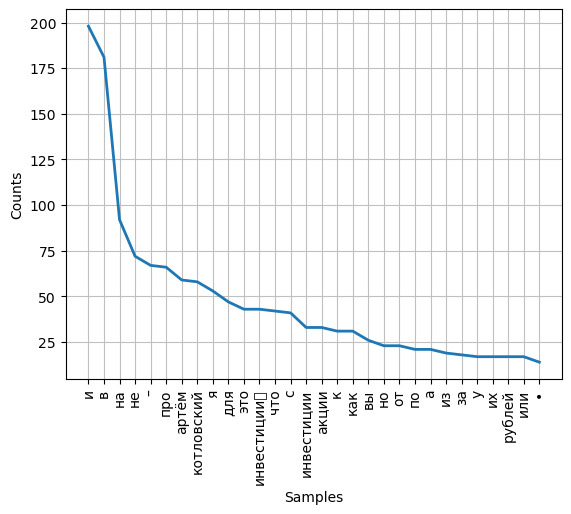

<Axes: xlabel='Samples', ylabel='Counts'>

In [22]:
fdist.plot(30,cumulative=False)

## Удаление стоп-слов

In [23]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это', 'нею'])

In [24]:
russian_stopwords.extend(['свои', "которые", 'своих', 'артем', 'котловский','артём'])

In [25]:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [26]:
print(len(russian_stopwords))
# russian_stopwords

159


In [27]:
%%time
text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]

CPU times: total: 15.6 ms
Wall time: 13 ms


In [28]:
print(len(text_tokens))

3936


In [29]:
text = nltk.Text(text_tokens)

In [30]:
fdist_sw = FreqDist(text)
fdist_sw.most_common(10)

[('–', 67),
 ('инвестиции🖼', 43),
 ('инвестиции', 33),
 ('акции', 33),
 ('рублей', 17),
 ('•', 14),
 ('инвестиционныйпортфель', 14),
 ('акций', 13),
 ('могут', 12),
 ('инвестор', 11)]

## Построение облака слов

In [31]:
# !pip install wordcloud

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
text_raw = " ".join(text)

In [41]:
import numpy as np
from PIL import Image

In [68]:
mask = np.array(Image.open('upvote.png'))

In [69]:
wordcloud = WordCloud(width = 2000, 
                      height = 1500, 
                      random_state=1, 
                      background_color='black', 
                      margin=25, 
                      colormap='Pastel1', 
                      collocations=False,
                      mask=mask
                     ).generate(text_raw)

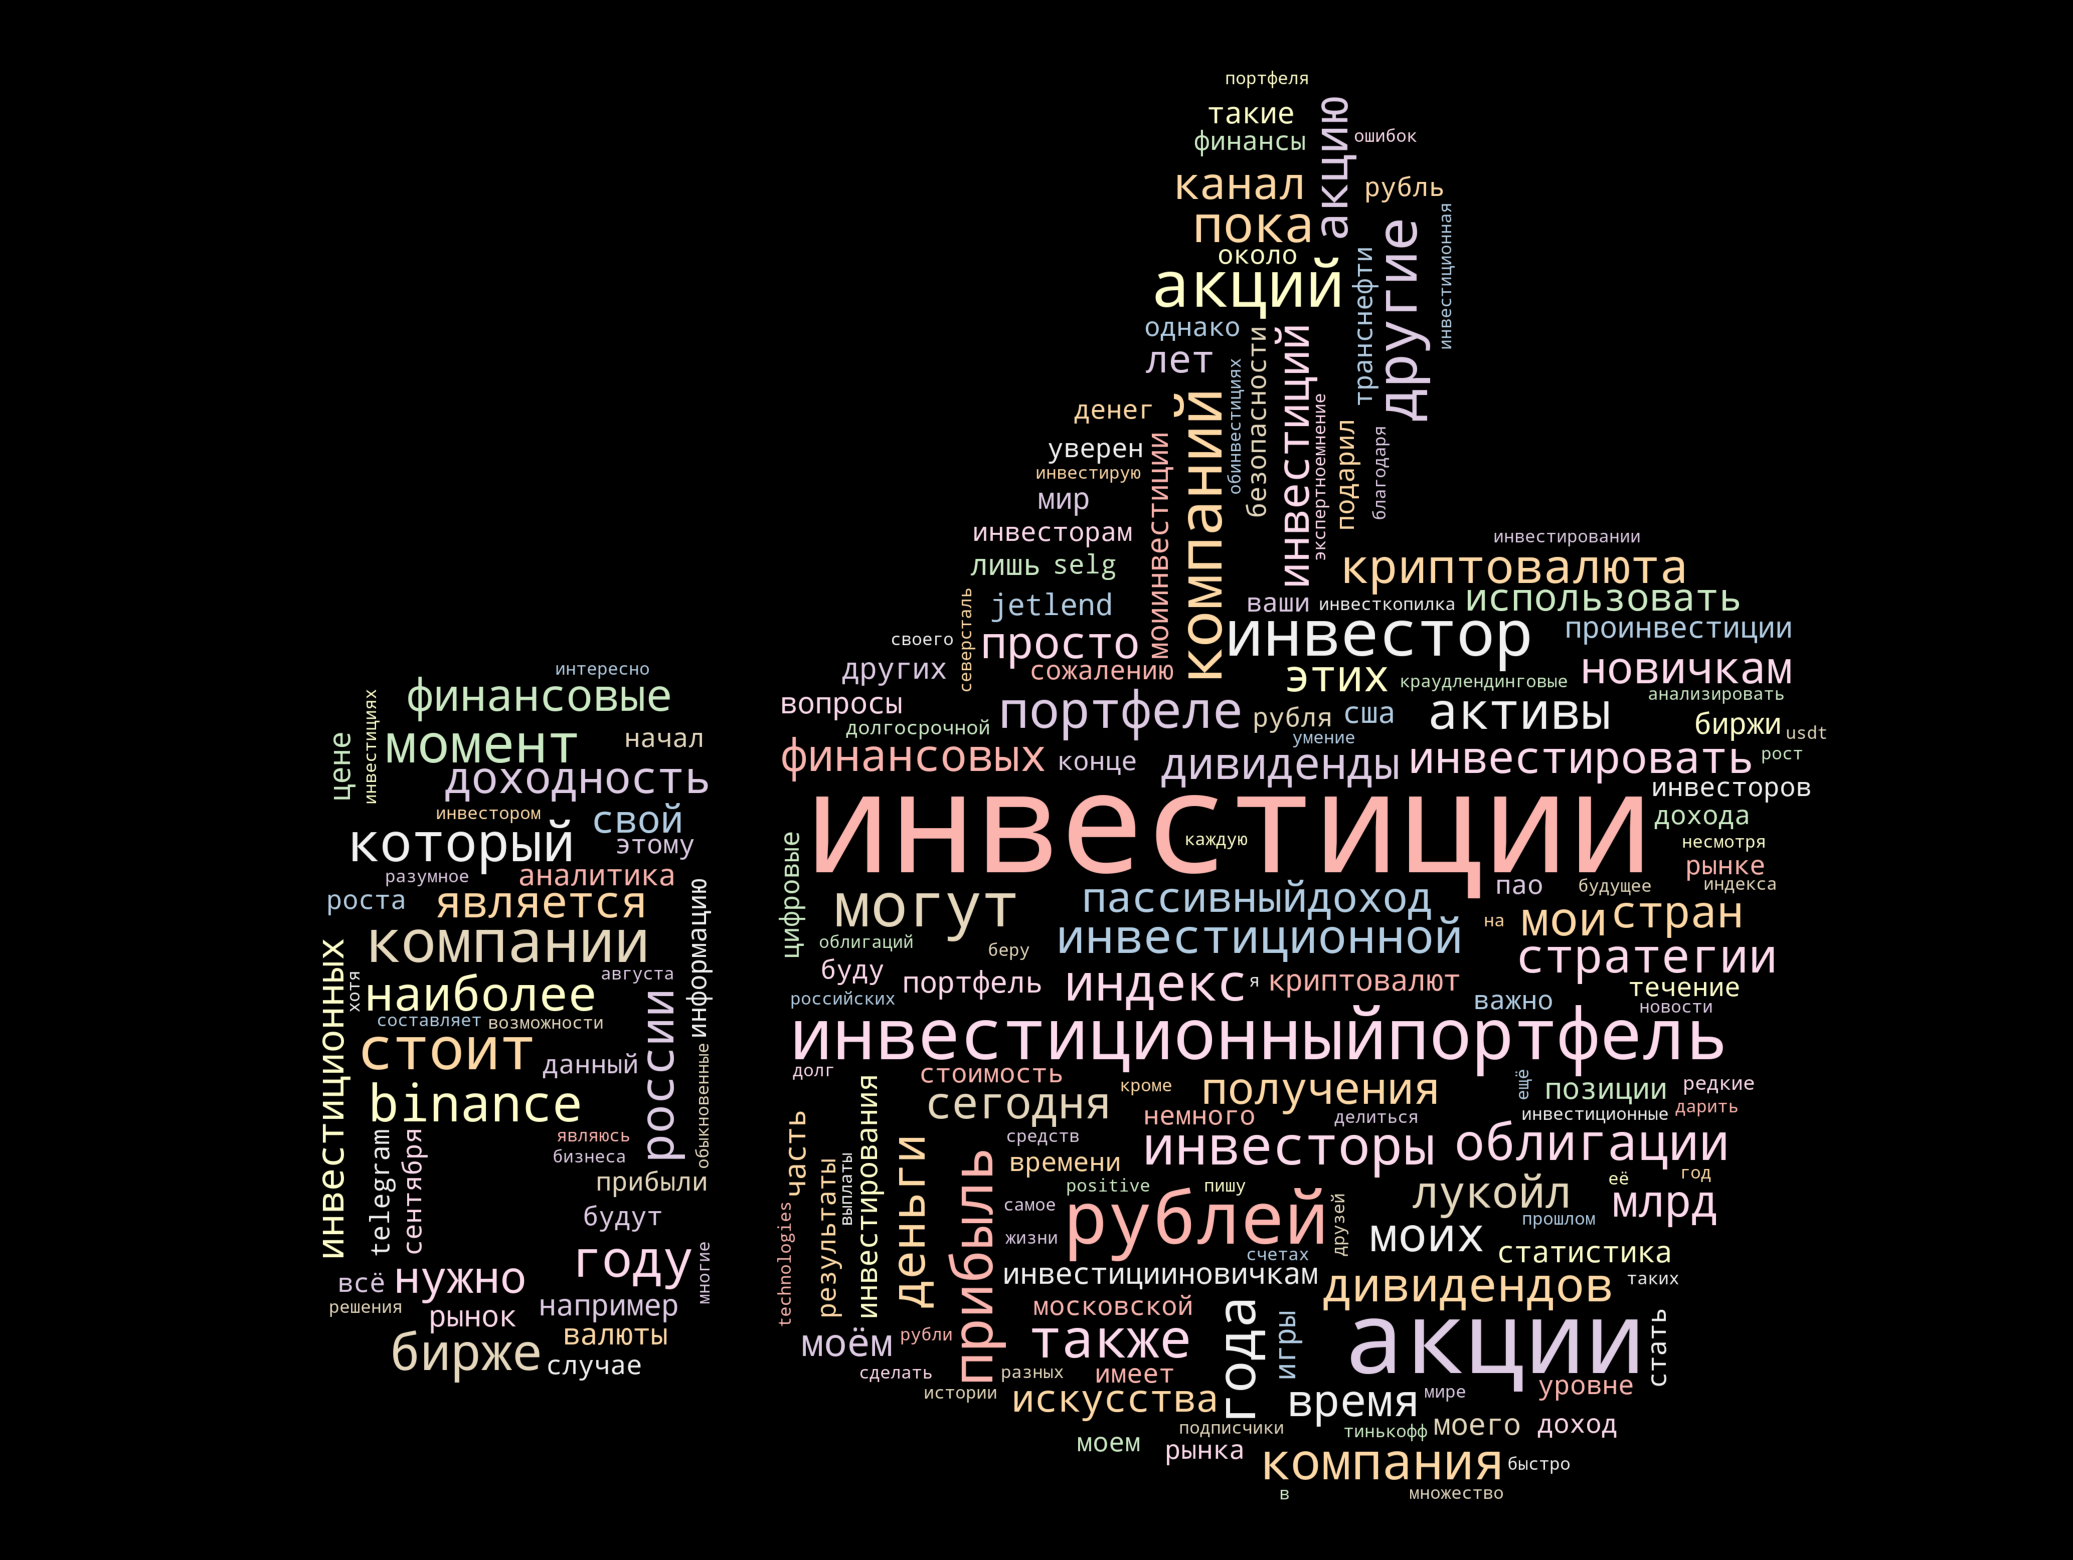

In [70]:
# plt.imshow(wordcloud, interpolation='bilinear')
plt.figure( figsize=(40,20), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
fdist2 = FreqDist(text)
fdist2

In [71]:
fdist_sw

FreqDist({'–': 67, 'инвестиции🖼': 43, 'инвестиции': 33, 'акции': 33, 'рублей': 17, '•': 14, 'инвестиционныйпортфель': 14, 'акций': 13, 'могут': 12, 'инвестор': 11, ...})

C:\Users\Maksim\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


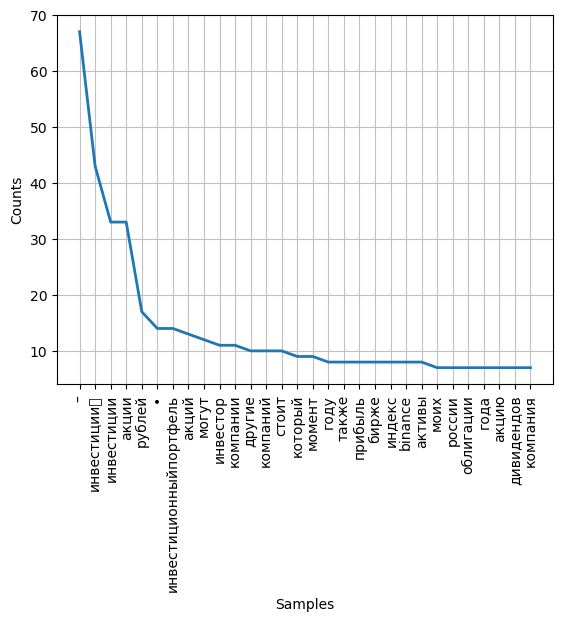

<Axes: xlabel='Samples', ylabel='Counts'>

In [72]:
fdist_sw.plot(30,cumulative=False)